# Overview
Welcome to the 2024 Kaggle Playground Series! We plan to continue in the spirit of previous playgrounds, providing interesting and approachable datasets for our community to practice their machine learning skills. We anticipate a competition each month.

## Your Goal
The goal of this competition is to predict the academic risk of students in higher education.

## About the Tabular Playground Series
The goal of the Tabular Playground Series is to provide the Kaggle community with a variety of fairly light-weight challenges that can be used to learn and sharpen skills in different aspects of machine learning and data science. The duration of each competition will generally only last a few weeks, and may have longer or shorter durations depending on the challenge. The challenges will generally use fairly light-weight datasets that are synthetically generated from real-world data, and will provide an opportunity to quickly iterate through various model and feature engineering ideas, create visualizations, etc.

## Synthetically-Generated Datasets
Using synthetic data for Playground competitions allows us to strike a balance between having real-world data (with named features) and ensuring test labels are not publicly available. This allows us to host competitions with more interesting datasets than in the past. While there are still challenges with synthetic data generation, the state-of-the-art is much better now than when we started the Tabular Playground Series two years ago, and the goal is to produce datasets that have far fewer artifacts. Please feel free to give us feedback on the datasets for the different competitions so that we can continue to improve!

In [44]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# Load data
train_df = pd.read_csv("/Users/youknowjp/Downloads/playground-series-s4e6/train.csv")
test_df = pd.read_csv("/Users/youknowjp/Downloads/playground-series-s4e6/test.csv")

In [5]:
# Display basic information about the datasets
(train_df.info(), test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

(None, None)

In [6]:
# Display the first few rows of each dataset
(train_df.head(), test_df.head())

(   id  Marital status  Application mode  Application order  Course  \
 0   0               1                 1                  1    9238   
 1   1               1                17                  1    9238   
 2   2               1                17                  2    9254   
 3   3               1                 1                  3    9500   
 4   4               1                 1                  2    9500   
 
    Daytime/evening attendance  Previous qualification  \
 0                           1                       1   
 1                           1                       1   
 2                           1                       1   
 3                           1                       1   
 4                           1                       1   
 
    Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
 0                           126.0            1                       1  ...   
 1                           125.0            1               

In [7]:
# Check for missing values
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()

# Get the summary statistics of the numerical features
train_describe = train_df.describe()
test_describe = test_df.describe()

(train_missing, test_missing, train_describe, test_describe)

(id                                                0
 Marital status                                    0
 Application mode                                  0
 Application order                                 0
 Course                                            0
 Daytime/evening attendance                        0
 Previous qualification                            0
 Previous qualification (grade)                    0
 Nacionality                                       0
 Mother's qualification                            0
 Father's qualification                            0
 Mother's occupation                               0
 Father's occupation                               0
 Admission grade                                   0
 Displaced                                         0
 Educational special needs                         0
 Debtor                                            0
 Tuition fees up to date                           0
 Gender                                       

## Analysis

Upon examining the data, it is evident that there are no missing values. The information in the given datasets has been thoroughly cleaned and organized for optimal performance with machine learning algorithms. The next step involves visualizing the data to identify any outliers and to select the relevant data for further analysis.

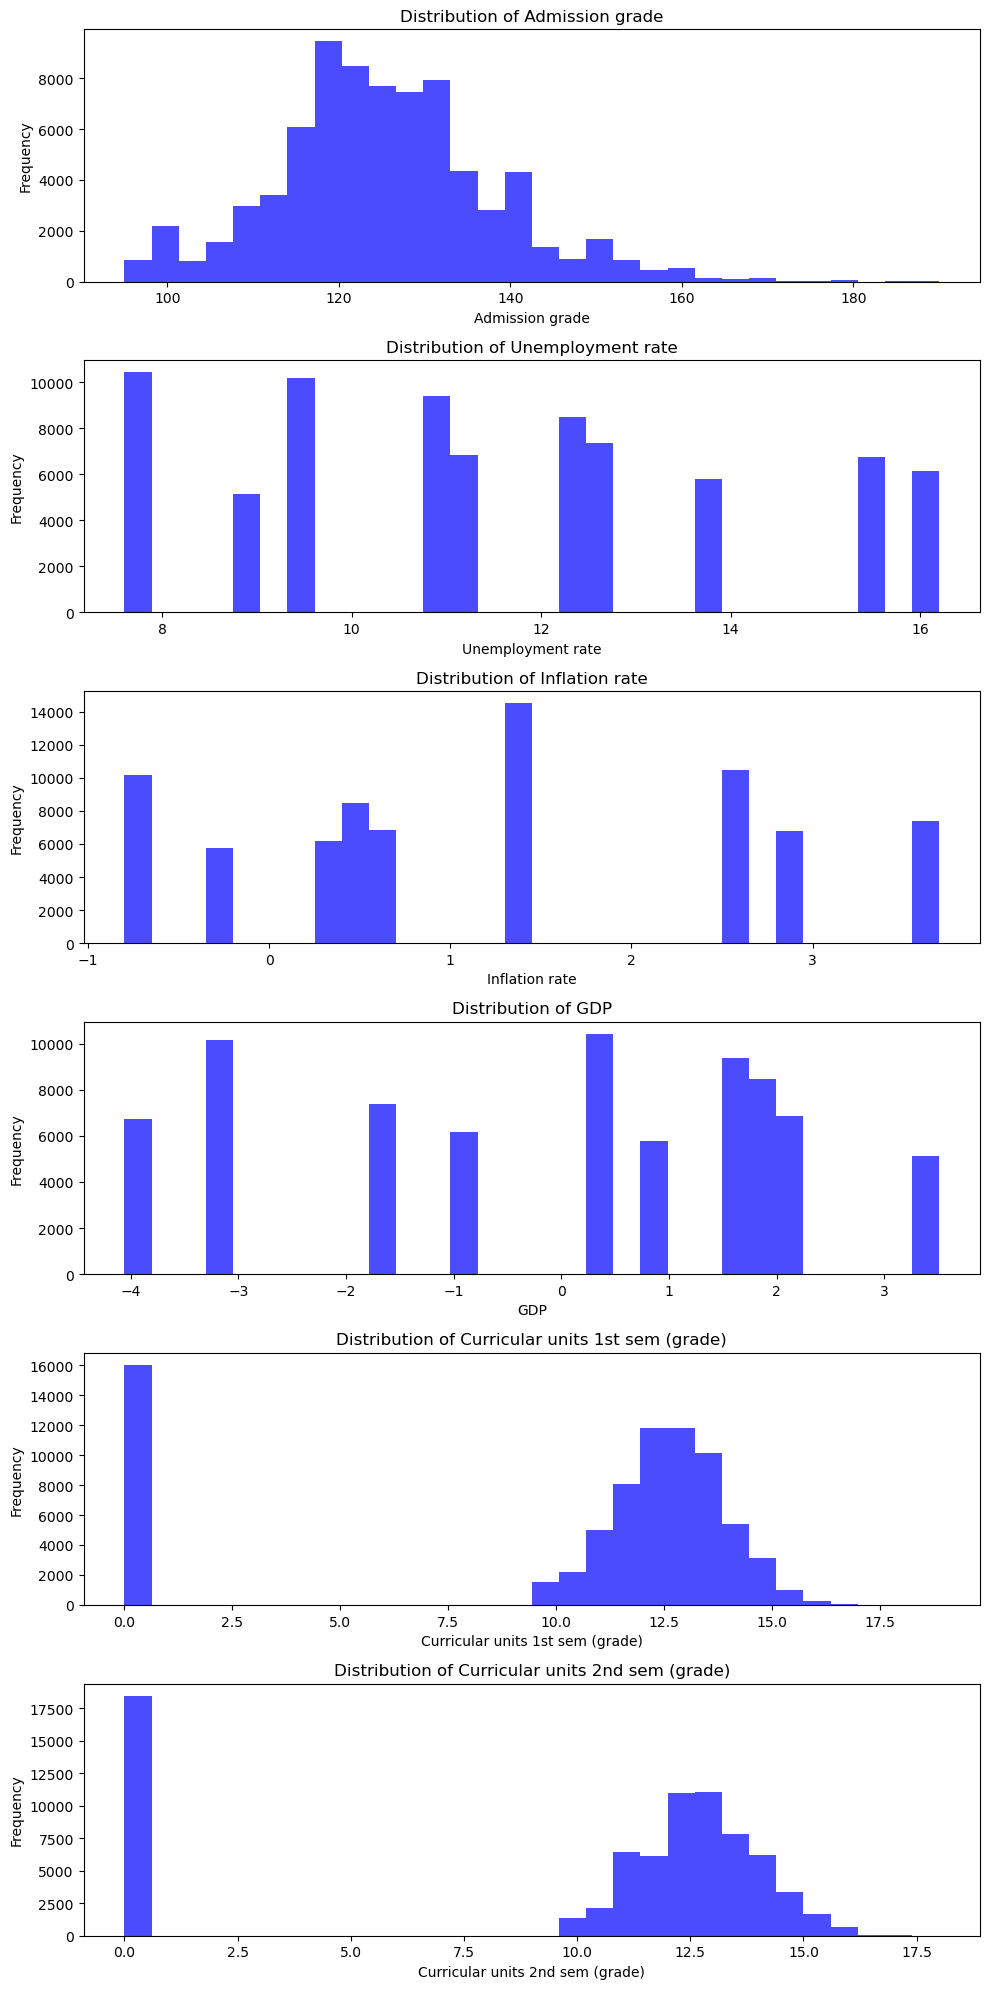

In [9]:
# List of numerical features to visualize
numerical_features = [
    "Admission grade", "Unemployment rate", "Inflation rate", "GDP",
    "Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)"
]

# Plot histograms for numerical features in train dataset
fig, axs = plt.subplots(len(numerical_features), 1, figsize=(10, 20))

for i, feature in enumerate(numerical_features):
    axs[i].hist(train_df[feature], bins=30, color="blue", alpha=0.7)
    axs[i].set_title(f"Distribution of {feature}")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

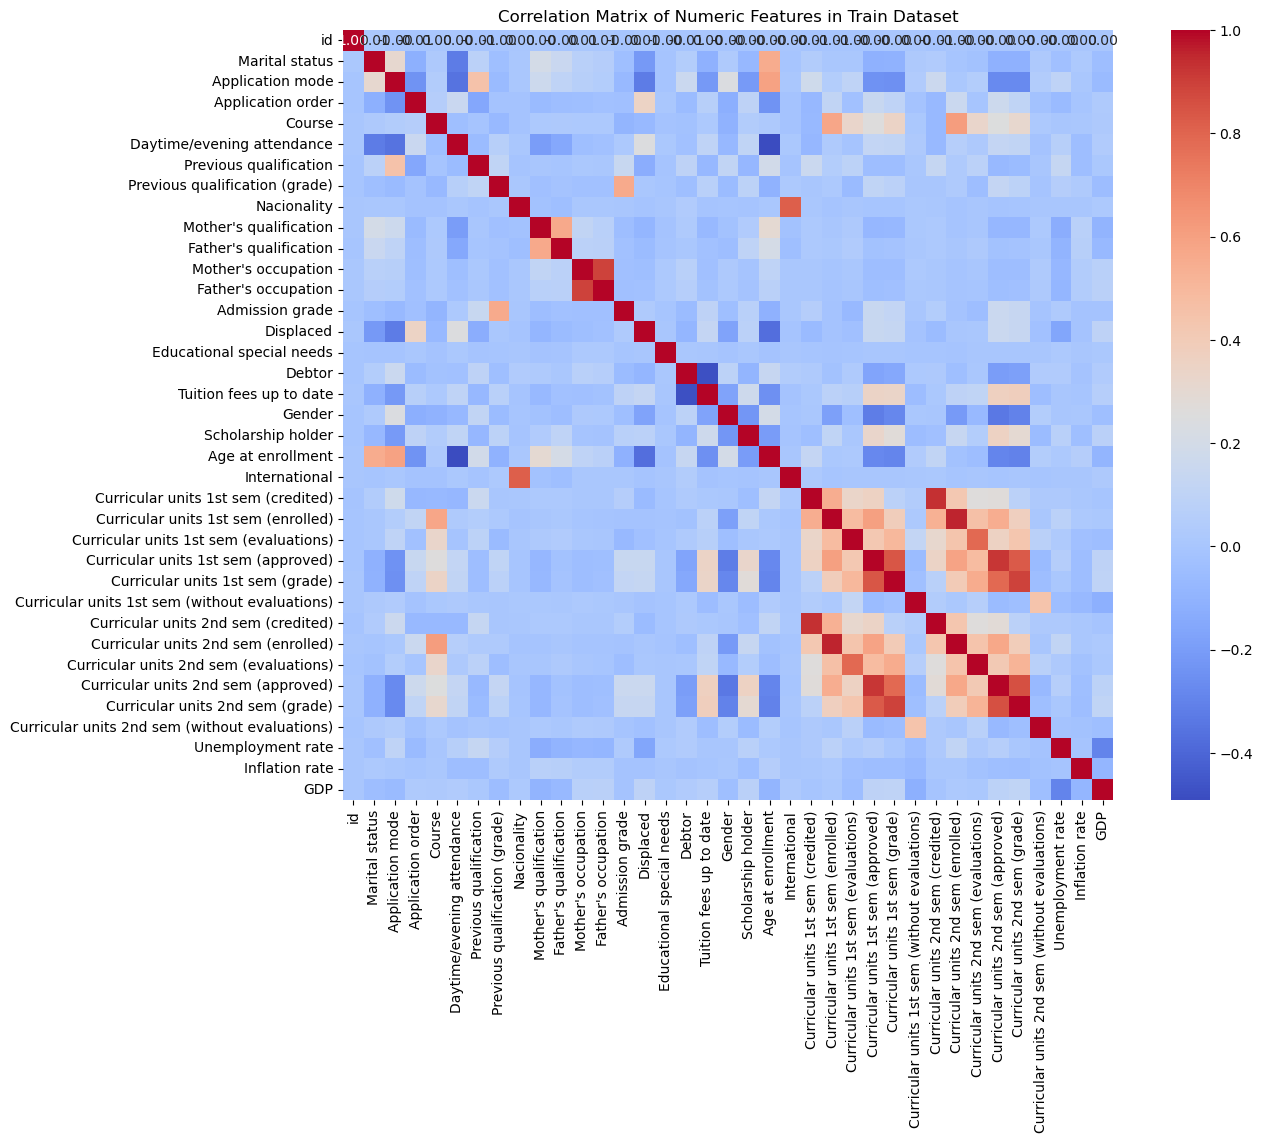

In [10]:
# Select only numeric columns
numeric_train_df = train_df.select_dtypes(include=[float, int])

# Compute the correlation matrix on numeric columns
numeric_correlation_matrix = numeric_train_df.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix of Numeric Features in Train Dataset")
plt.show()


## Machine Learning

Based on the comprehensive analysis conducted, the next step is to develop a machine learning algorithm to predict the target outcome of the dataset. The data has been meticulously cleaned, and the correlations between each column"s values have been considered. Additionally, outliers have been accounted for to ensure the robustness of the selected machine learning algorithms.

In [34]:
# Use Decision Tree Classifier
# Assuming "Target" is the column to predict and it is the last column in the dataset
# If it"s named differently, please replace "Target" with the correct column name

# Split the dataset into features and target
X = train_df.drop(columns=["id", "Target"])  # Dropping "id" and "Target" columns
y = train_df["Target"]  # Adjust this if the target column has a different name

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Use train_test_split to create a smaller subset of the data
X_small, _, y_small, _ = train_test_split(X_train, y_train, train_size=1000, random_state=42)

# Initialize the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_small, y_small)

# Make predictions on the validation set
y_pred_tree = tree_model.predict(X_val)

# Evaluate the model
accuracy_tree = accuracy_score(y_val, y_pred_tree)
classification_rep_tree = classification_report(y_val, y_pred_tree)

print(f"Accuracy: {accuracy_tree}")
print("Classification Report:")
print(classification_rep_tree)

Accuracy: 0.7422242550967068
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      5028
           1       0.49      0.47      0.48      3017
           2       0.82      0.81      0.81      7259

    accuracy                           0.74     15304
   macro avg       0.70      0.70      0.70     15304
weighted avg       0.74      0.74      0.74     15304



In [38]:
# Use XgBoost
# Assuming 'Target' is the column to predict and it is the last column in the dataset
# If it's named differently, please replace 'Target' with the correct column name

# Split the dataset into features and target
X = train_df.drop(columns=['id', 'Target'])  # Dropping 'id' and 'Target' columns
y = train_df['Target']  # Adjust this if the target column has a different name

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate the model
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
classification_rep_xgb = classification_report(y_val, y_pred_xgb)

print(f"Accuracy: {accuracy_xgb}")
print("Classification Report:")
print(classification_rep_xgb)

Accuracy: 0.8331808677469943
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      5028
           1       0.66      0.61      0.63      3017
           2       0.86      0.92      0.89      7259

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.80     15304
weighted avg       0.83      0.83      0.83     15304



In [42]:
# Prepare the test data for prediction
X_test = test_df.drop(columns=['id'])  # Drop the 'id' column but keep it for final output
test_ids = test_df['id']

# Make predictions on the test set
test_pred = xgb_model.predict(X_test)

# Create a DataFrame with 'id' and 'Target' columns
submission_df = pd.DataFrame({'id': test_ids, 'Target': label_encoder.inverse_transform(test_pred)})

# Save the predictions to a CSV file
submission_df.to_csv('test_predictions.csv', index=False)

# Save
print(f"Submission Save")

Submission Save
